# Mini Project 3

**2025 Introduction to Quantiative Methods in Finance**

**The Erdös Institute**

The code below provides a visual representation of how the Black-Scholes **call option** price changes with respect to time.

**a)** Use the visualization to interpret how the *rate of change* of the Black-Scholes call option price behaves as time progresses.

**b)** Create a separate graphic to visualize how the *rate of change* of the Black-Scholes call option price depends on the spot price $S(0)$.

**c)** Repeat parts **a** and **b** for **put option** prices.

**d)** Use the space below to record your observations and reflections based on the generated plots.

---

### Observations:

- *Call Option – Time Sensitivity:* The call option price decreases more rapidly as it gets closer to expiration (shorter time).
- *Call Option – Spot Price Sensitivity:* The sensitivity with respect to spot price (delta) increases as $S(0)$ increases, especially when $S(0)$ approaches or exceeds $K = 110$. This shows that call options become more responsive (delta increases toward 1) when they’re deeper in the money. 
- *Put Option – Time Sensitivity:* The put option price also decays over time. 
- *Put Option – Spot Price Sensitivity:* The put option’s delta is negative and becomes more negative as the spot price decreases. This is expected — the lower the spot price, the more valuable the put, and the stronger the negative sensitivity.

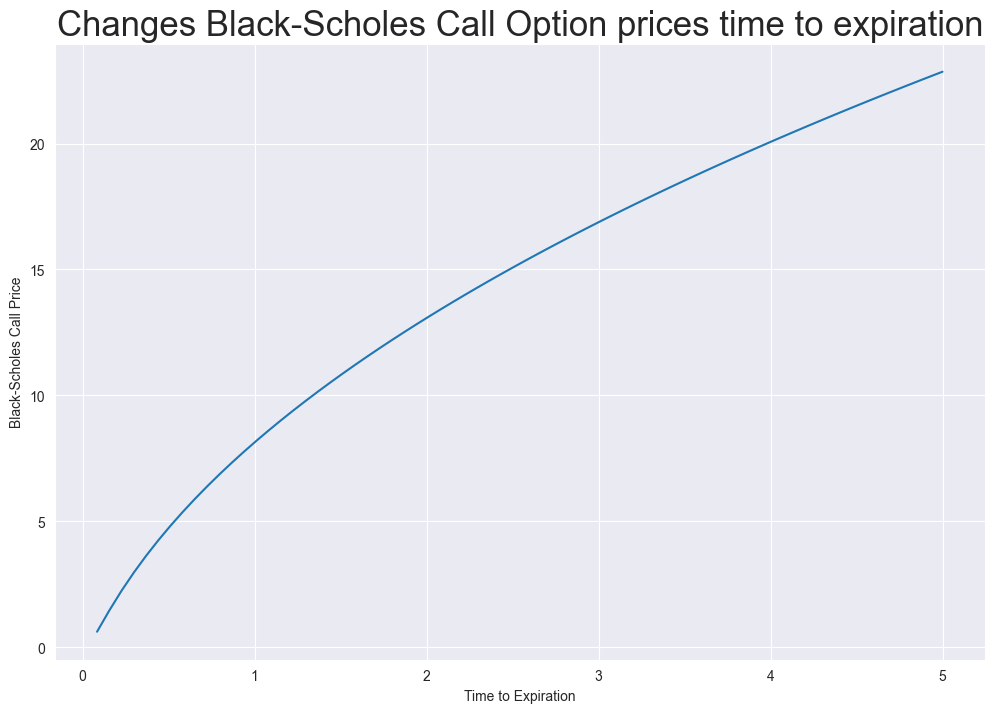

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

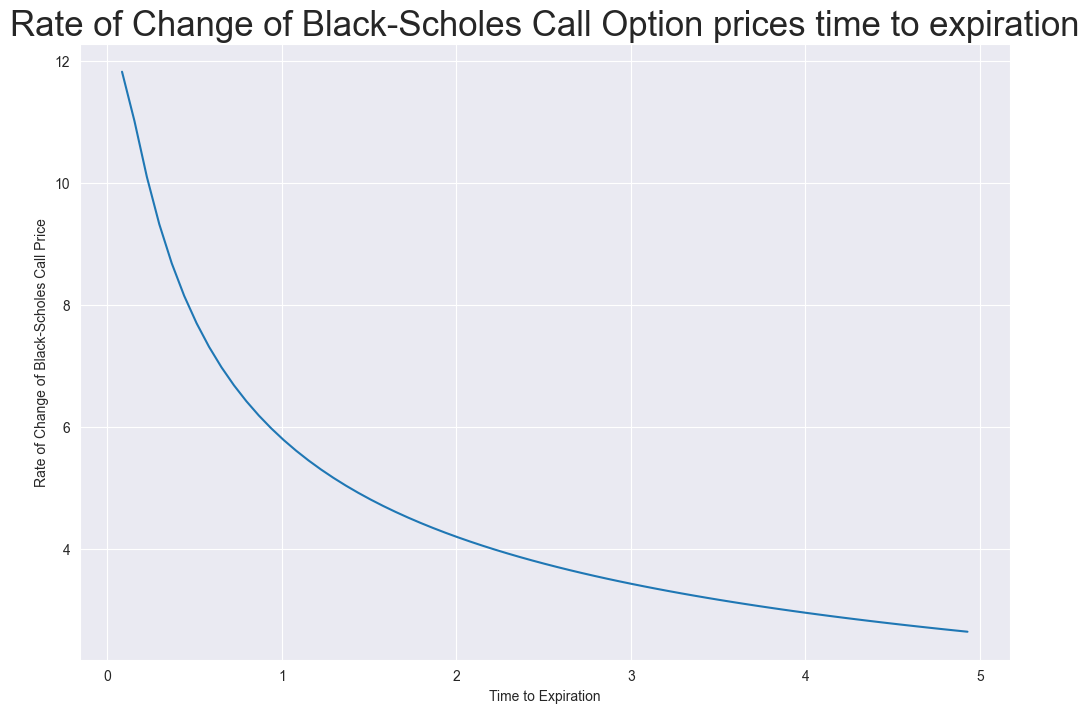

In [2]:
# rate of change of call price w.r.t. time
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0=S0,K=K,sigma=sigma,t=times[i]) for i in range(len(times))]
call_prices_rate_of_change = [(call_prices[i + 1] - call_prices[i]) / ((times[i + 1] - times[i])) for i in range(len(times) - 1)]

plt.figure(figsize = (12,8))
plt.title('Rate of Change of Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times[:-1], call_prices_rate_of_change)
plt.xlabel('Time to Expiration')
plt.ylabel('Rate of Change of Black-Scholes Call Price')
plt.show()

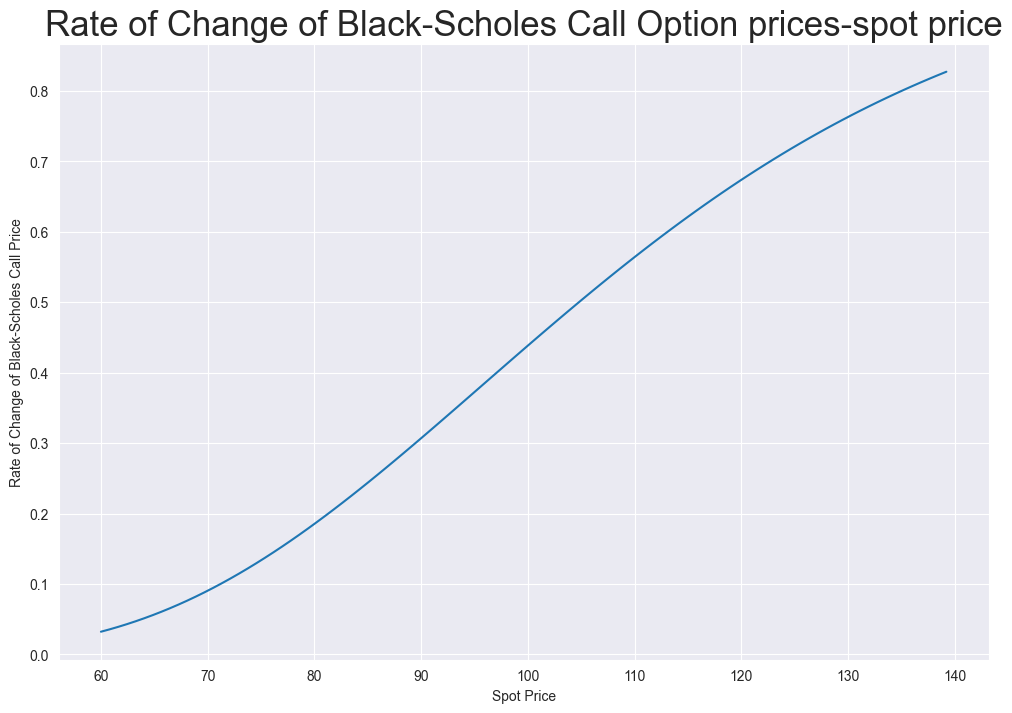

In [3]:
# rate of change of call price w.r.t. spot price
S0_lst = np.linspace(60, 140, 100)
K = 110
sigma = .3
time = 1.


call_prices = [bs_call(S0=S0_lst[i],K=K,sigma=sigma,t=time) for i in range(len(S0_lst))]
call_prices_rate_of_change = [(call_prices[i + 1] - call_prices[i]) / ((S0_lst[i + 1] - S0_lst[i])) for i in range(len(S0_lst) - 1)]

plt.figure(figsize = (12,8))
plt.title('Rate of Change of Black-Scholes Call Option prices-spot price', size = 25)
plt.plot(S0_lst[:-1], call_prices_rate_of_change)
plt.xlabel('Spot Price')
plt.ylabel('Rate of Change of Black-Scholes Call Price')
plt.show()

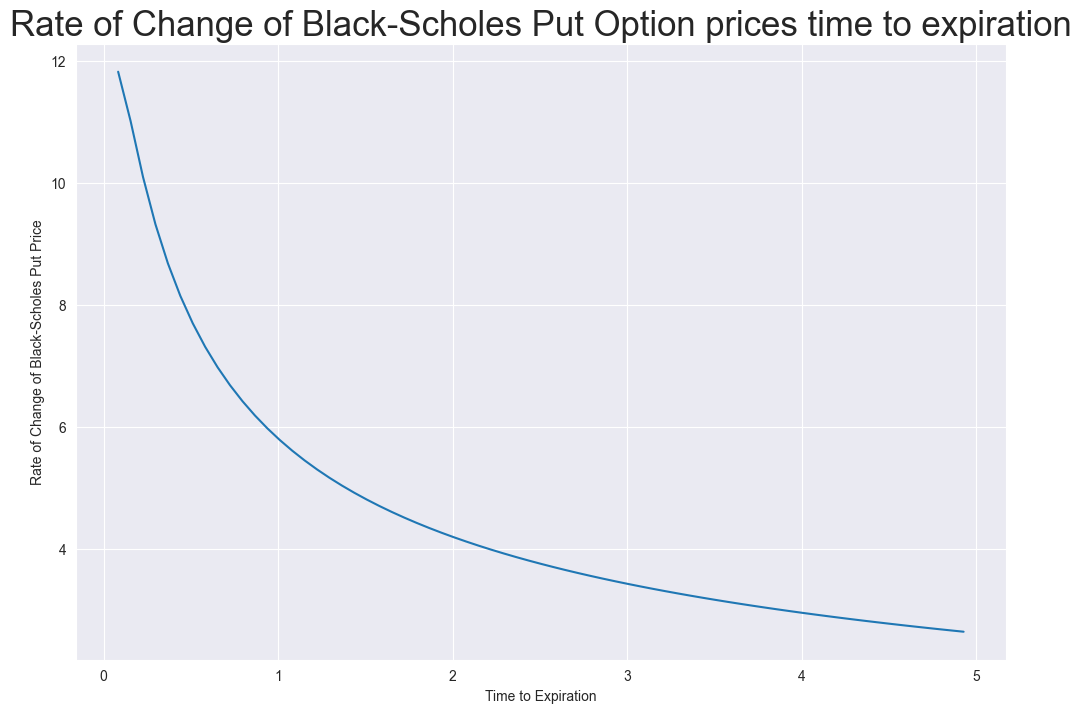

In [5]:
# rate of change of put price w.r.t. time
S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


put_prices = [bs_put(S0=S0,K=K,sigma=sigma,t=times[i]) for i in range(len(times))]
put_prices_rate_of_change = [(put_prices[i + 1] - put_prices[i]) / ((times[i + 1] - times[i])) for i in range(len(times) - 1)]

plt.figure(figsize = (12,8))
plt.title('Rate of Change of Black-Scholes Put Option prices time to expiration', size = 25)
plt.plot(times[:-1], put_prices_rate_of_change)
plt.xlabel('Time to Expiration')
plt.ylabel('Rate of Change of Black-Scholes Put Price')
plt.show()

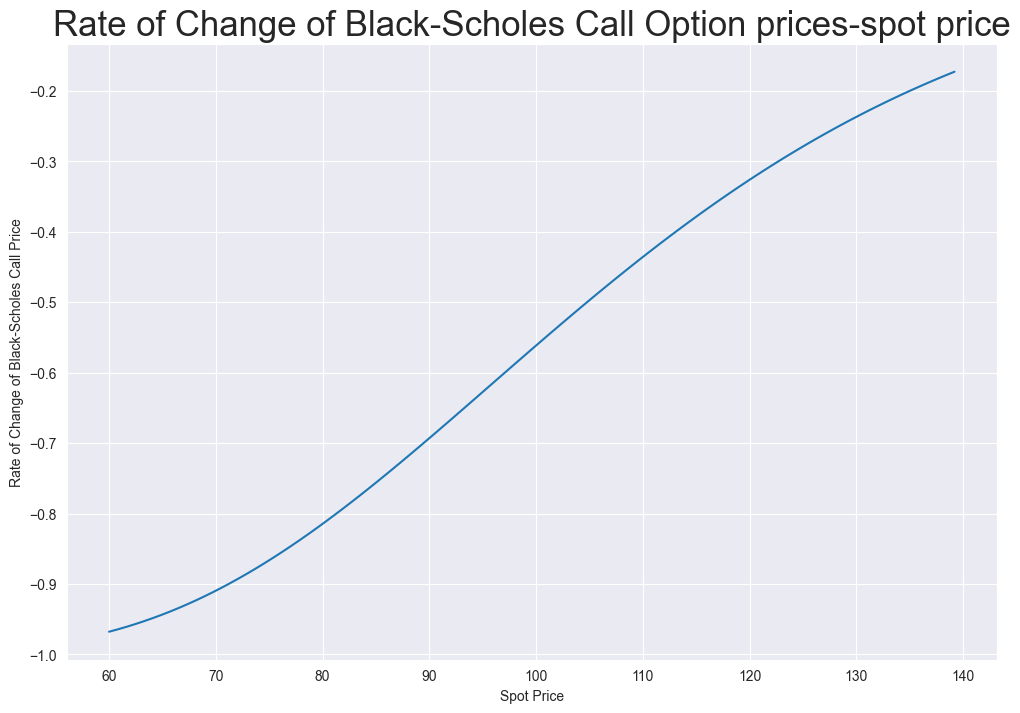

In [ ]:
# rate of change of put price w.r.t. spot price
S0_lst = np.linspace(60, 140, 100)
K = 110
sigma = .3
time = 1.


put_prices = [bs_put(S0=S0_lst[i],K=K,sigma=sigma,t=time) for i in range(len(S0_lst))]
put_prices_rate_of_change = [(put_prices[i + 1] - put_prices[i]) / ((S0_lst[i + 1] - S0_lst[i])) for i in range(len(S0_lst) - 1)]

plt.figure(figsize = (12,8))
plt.title('Rate of Change of Black-Scholes Put Option prices-spot price', size = 25)
plt.plot(S0_lst[:-1], call_prices_rate_of_change)
plt.xlabel('Spot Price')
plt.ylabel('Rate of Change of Black-Scholes Put Price')
plt.show()